# **SELF-DRIVING CAR USING UDACITY’S CAR SIMULATOR ENVIRONMENT AND TRAINED BY DEEP NEURAL NETWORKS**

We will be using Google Colab for doing the training process or Kaggle. We will open a new python3 notebook and get started. Next, we will git clone the repo.

```!git clone https://github.com/Asikpalysik/Self-Driving-Car.git```

# **Import libraries**

We will now import all the libraries needed for training process. It will use Tensorflow backend and keras at frontend.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random
import warnings
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import resize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
import time

warnings.filterwarnings("ignore")

We will upload a dataset from kaggle using API

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ayagulormanova","key":"a3bf379783c20a2474435f2023aac726"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle datasets download -d zaynena/selfdriving-car-simulator

 99% 2.23G/2.24G [00:34<00:00, 119MB/s]
100% 2.24G/2.24G [00:34<00:00, 70.3MB/s]


In [ ]:
! unzip {"selfdriving-car-simulator.zip"} -d kaggle_data

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: kaggle_data/track2data/track2data/IMG/right_2019_04_02_18_25_14_348.jpg  
  inflating: kaggle_data/track2data/track2data/IMG/right_2019_04_02_18_25_14_416.jpg  
  inflating: kaggle_data/track2data/track2data/IMG/right_2019_04_02_18_25_14_483.jpg  
  inflating: kaggle_data/track2data/track2data/IMG/right_2019_04_02_18_25_14_555.jpg  
  inflating: kaggle_data/track2data/track2data/IMG/right_2019_04_02_18_25_14_623.jpg  
  inflating: kaggle_data/track2data/track2data/IMG/right_2019_04_02_18_25_14_695.jpg  
  inflating: kaggle_data/track2data/track2data/IMG/right_2019_04_02_18_25_14_764.jpg  
  inflating: kaggle_data/track2data/track2data/IMG/right_2019_04_02_18_25_14_833.jpg  
  inflating: kaggle_data/track2data/track2data/IMG/right_2019_04_02_18_25_14_907.jpg  
  inflating: kaggle_data/track2data/track2data/IMG/right_2019_04_02_18_25_14_979.jpg  
  inflating: kaggle_data/track2data/track2data/IMG/right_2019_

# **Read CSV**

We wil use datadir as the name given to the folder itself and take the parameters itself. Using head, we will show the first five values for the CSV on the desired format.

In [ ]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv('/content/kaggle_data/dataset/dataset/driving_log.csv', names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,Desktop\track1data\IMG\center_2019_04_02_19_25_33_671.jpg,Desktop\track1data\IMG\left_2019_04_02_19_25_33_671.jpg,Desktop\track1data\IMG\right_2019_04_02_19_25_33_671.jpg,0.0,0.000000,0.0,0.000011
1,Desktop\track1data\IMG\center_2019_04_02_19_25_33_743.jpg,Desktop\track1data\IMG\left_2019_04_02_19_25_33_743.jpg,Desktop\track1data\IMG\right_2019_04_02_19_25_33_743.jpg,0.0,0.000000,0.0,0.000007
2,Desktop\track1data\IMG\center_2019_04_02_19_25_33_816.jpg,Desktop\track1data\IMG\left_2019_04_02_19_25_33_816.jpg,Desktop\track1data\IMG\right_2019_04_02_19_25_33_816.jpg,0.0,0.000000,0.0,0.000003
3,Desktop\track1data\IMG\center_2019_04_02_19_25_33_887.jpg,Desktop\track1data\IMG\left_2019_04_02_19_25_33_887.jpg,Desktop\track1data\IMG\right_2019_04_02_19_25_33_887.jpg,0.0,0.048016,0.0,0.002267
4,Desktop\track1data\IMG\center_2019_04_02_19_25_33_959.jpg,Desktop\track1data\IMG\left_2019_04_02_19_25_33_959.jpg,Desktop\track1data\IMG\right_2019_04_02_19_25_33_959.jpg,0.0,0.281203,0.0,0.175589


As this is picking up the entire path from the local machine, we need to use ntpath function to get the network path assigned. We will declare a name path_leaf and assign accordingly.

In [ ]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2019_04_02_19_25_33_671.jpg,left_2019_04_02_19_25_33_671.jpg,right_2019_04_02_19_25_33_671.jpg,0.0,0.000000,0.0,0.000011
1,center_2019_04_02_19_25_33_743.jpg,left_2019_04_02_19_25_33_743.jpg,right_2019_04_02_19_25_33_743.jpg,0.0,0.000000,0.0,0.000007
2,center_2019_04_02_19_25_33_816.jpg,left_2019_04_02_19_25_33_816.jpg,right_2019_04_02_19_25_33_816.jpg,0.0,0.000000,0.0,0.000003
3,center_2019_04_02_19_25_33_887.jpg,left_2019_04_02_19_25_33_887.jpg,right_2019_04_02_19_25_33_887.jpg,0.0,0.048016,0.0,0.002267
4,center_2019_04_02_19_25_33_959.jpg,left_2019_04_02_19_25_33_959.jpg,right_2019_04_02_19_25_33_959.jpg,0.0,0.281203,0.0,0.175589


#**Data Normalization & Data Information**

We will bin the number of values where the number will be equal to 25 (odd number aimed to get center distribution). We will see the histogram using the np.histogram option on data frame ‘steering’, we will divide it to the number of bins.
We keep samples at 400 and then we draw a line. We see the data is centered along the middle that is 0.

In [ ]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)

In [ ]:
print(bins)

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


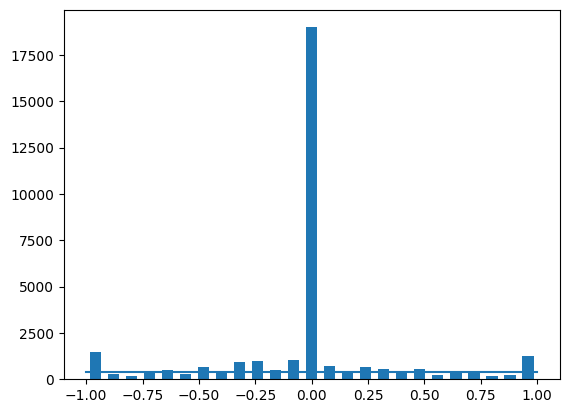

In [ ]:
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), \
(samples_per_bin, samples_per_bin))

In [ ]:
print('total data:', len(data))

total data: 32443


# **Balancing Steering Angle Data for Improved Uniformity**

We wil specify a variable remove_list.We will specify samples we want to remove using looping construct through every single bin we will iterate through all the steering data. We will shuffle the data and romve some from it as it is now uniformly structured after shuffling.The output will be the distribution of steering angle that are much more uniform. There are significant amount of left steering angle and right steering angle eliminating the bias to drive straight all the time.

In [ ]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
print('removed:', len(remove_list))

removed: 23671


In [ ]:
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

remaining: 8772


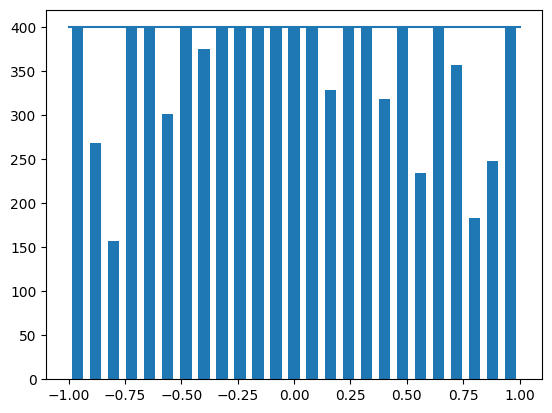

In [ ]:
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), \
(samples_per_bin, samples_per_bin))

In [ ]:
print(data.iloc[1])

center      center_2019_04_02_19_25_35_092.jpg
left        left_2019_04_02_19_25_35_092.jpg  
right       right_2019_04_02_19_25_35_092.jpg 
steering   -0.15                              
throttle    0.162716                          
reverse     0.0                               
speed       6.269065                          
Name: 20, dtype: object


# **Loading and Manipulating Images with Steering Data**

We will now load the image into array to manipulate them accordingly. We will define a function named locd_img_steering. We will have image path as empty list and steering as empty list and then loop through. We use iloc selector as data frame based on the specific index we will use cut data for now.

In [ ]:
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

image_paths, steerings = load_img_steering('/content/kaggle_data/dataset/dataset/IMG', data)

We will be splitting the image path as well as storing arrays accordingly.

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 21052
Valid Samples: 5264


# **Plotting histograms**

We will have the histograms now.

Text(0.5, 1.0, 'Validation set')

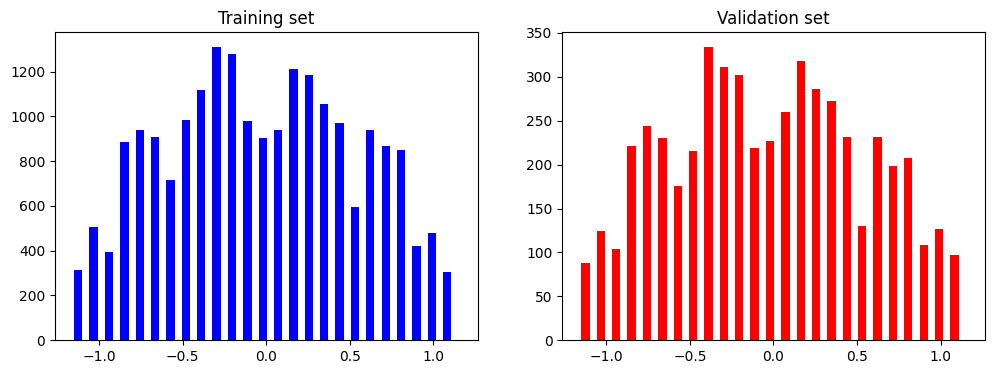

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

# **Define a function for feature extraction using HOG**

In [ ]:
def extract_hog_features(image_path):
  image = imread(image_path)
  image = resize(image, (128, 64))  # Resize to standard size for HOG
  features, hog_image = hog(image, pixels_per_cell=(16, 16),
                            cells_per_block=(2, 2),
                            orientations=9,
                            visualize=True,
                            multichannel=True)
  return features

# **Helper function for visualization**

In [ ]:

def visualize_clusters(features, clusters, title):
    # Reduce the dimensionality for visualization
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(features)

    # Plot the reduced features with cluster color-coding
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis', marker='o', s=50)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# **K-means clustering**

In [ ]:
def kmeans_clustering():
    hog_features = np.array([extract_hog_features(img_path) for img_path in image_paths])

    num_clusters=3
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)

    start_time = time.time()
    clusters = kmeans.fit_predict(hog_features)
    end_time = time.time()

    print(f"Time taken for K-means clustering: {end_time - start_time:.2f} seconds")
    visualize_clusters(hog_features, clusters, "K-means Сlustering")



# **Hierarchical Clustering with HOG Features**

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster

def hierarchical_clustering():
    hog_features = np.array([extract_hog_features(img_path) for img_path in image_paths])
    num_clusters=3

    # Use the linkage method of hierarchical clustering on HOG features
    Z = sch.linkage(hog_features, method='ward')

    # Form clusters based on the linkage matrix Z
    start_time = time.time()
    clusters = fcluster(Z, num_clusters, criterion='maxclust')
    end_time = time.time()

    print(f"Time taken for Hierarchical clustering: {end_time - start_time:.2f} seconds")

    # Plot the dendrogram
    plt.figure(figsize=(25, 10))
    sch.dendrogram(Z)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Image Index')
    plt.ylabel('Distance')
    plt.show()

    visualize_clusters(hog_features, clusters, "Hierarchical Clustering")


# **DBSCAN Clustering with HOG Features**

In [ ]:

def dbscan_clustering():
    hog_features = np.array([extract_hog_features(img_path) for img_path in image_paths])

    # Apply DBSCAN clustering on HOG features
    dbscan = DBSCAN(eps=0.1, min_samples=10)

    start_time = time.time()
    clusters = dbscan.fit_predict(hog_features)
    end_time = time.time()

    print(f"Time taken for DBSCAN clustering: {end_time - start_time:.2f} seconds")
    visualize_clusters(hog_features, clusters, "DBSCAN Clustering")


# **Gaussian Mixture Clustering with HOG Features**

In [ ]:
def gaussian_mixture_clustering():
    hog_features = np.array([extract_hog_features(img_path) for img_path in image_paths])

    # Apply Gaussian Mixture clustering on HOG features
    gmm = GaussianMixture(n_components=3)

    start_time = time.time()
    clusters = gmm.fit_predict(hog_features)
    end_time = time.time()

    print(f"Time taken for Gaussian Mixture clustering: {end_time - start_time:.2f} seconds")
    visualize_clusters(hog_features, clusters, "Gaussian Mixture Clustering")


# **Mean-Shift Clustering with HOG Features**

In [ ]:
def mean_shift_clustering():
    hog_features = np.array([extract_hog_features(img_path) for img_path in image_paths])

    # Apply Mean-Shift clustering on HOG features
    meanshift = MeanShift(bandwidth=0.1)

    start_time = time.time()
    clusters = meanshift.fit_predict(hog_features)
    end_time = time.time()

    print(f"Time taken for Mean-Shift clustering: {end_time - start_time:.2f} seconds")
    visualize_clusters(hog_features, clusters, "Mean-Shift Clustering")


K-means Clustering:
Time taken for K-means clustering: 16.08 seconds


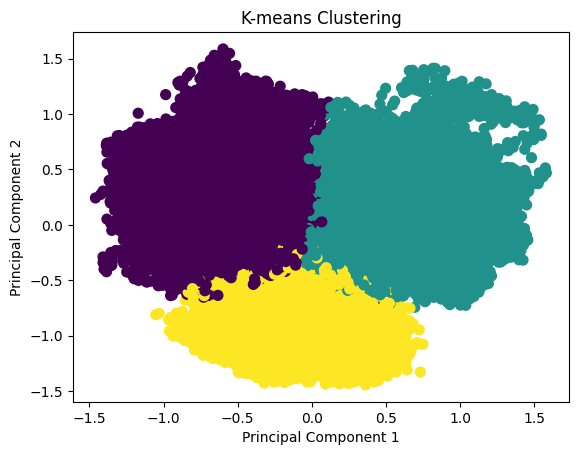

In [ ]:
print("K-means Clustering:")
kmeans_clustering()


Hierarchical Clustering:
Time taken for Hierarchical clustering: 0.05 seconds


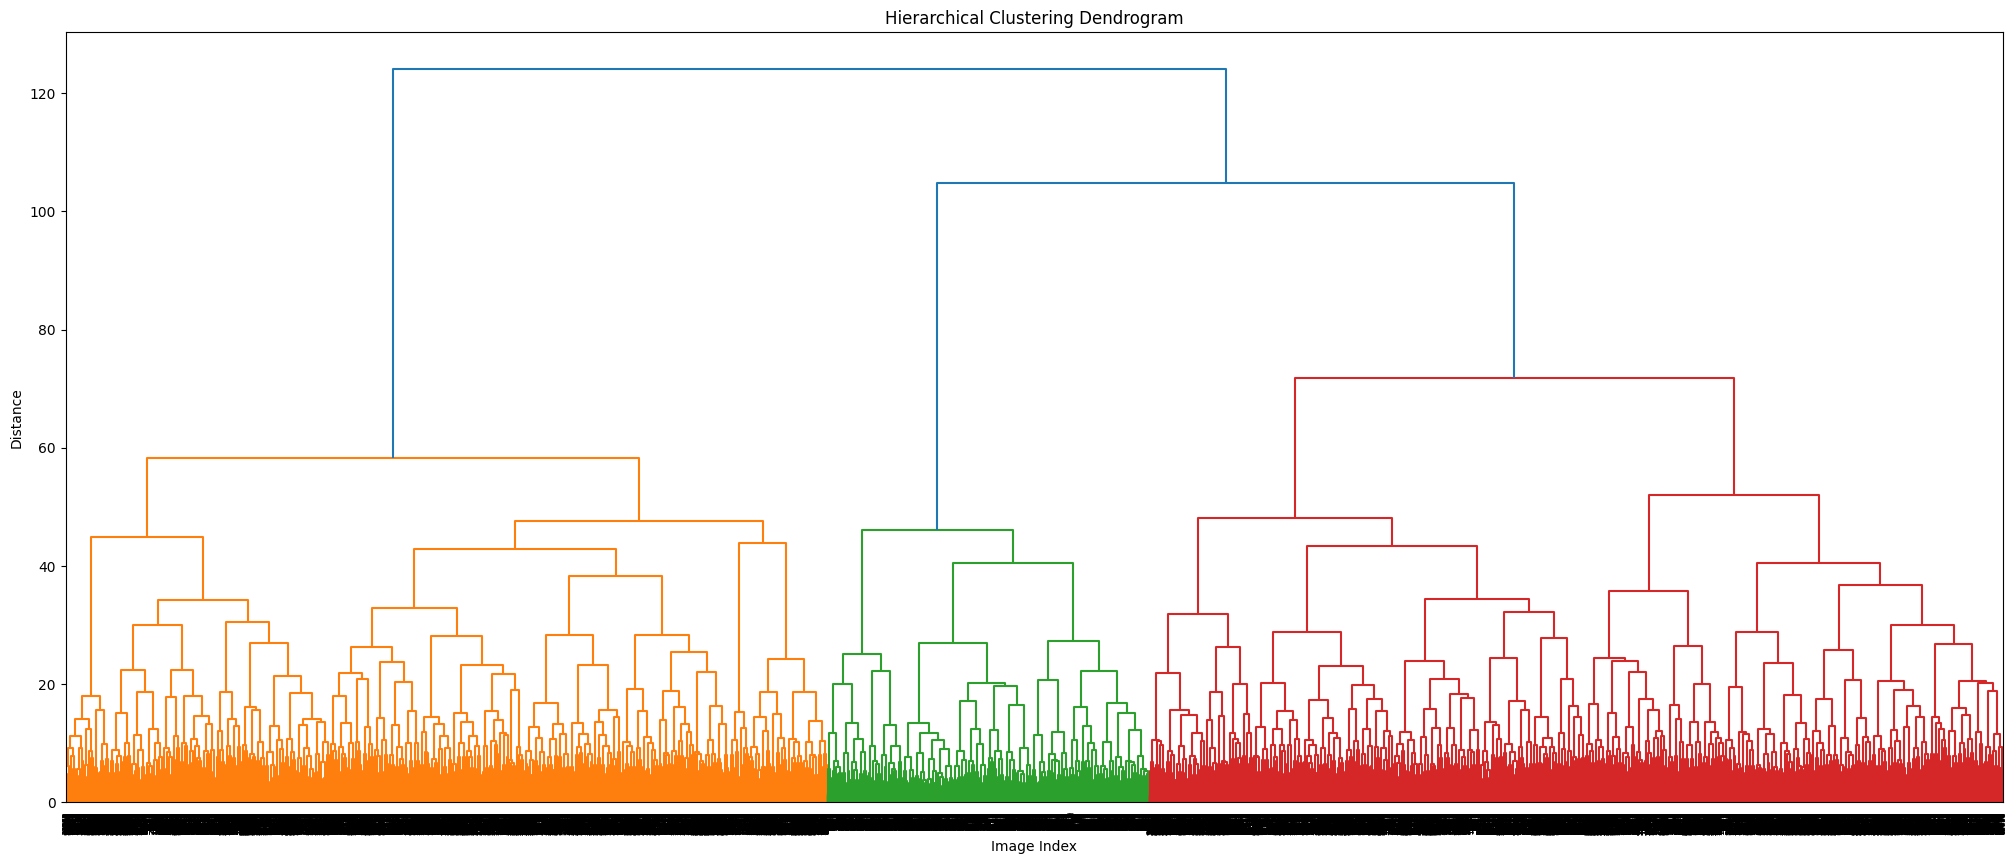

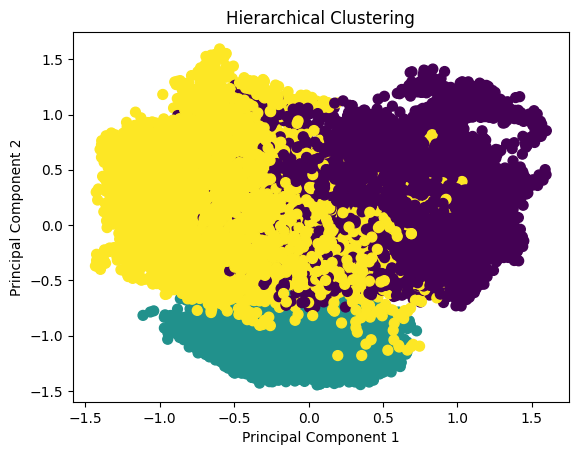

In [ ]:
print("\nHierarchical Clustering:")
hierarchical_clustering()


DBSCAN Clustering:
Time taken for DBSCAN clustering: 42.32 seconds


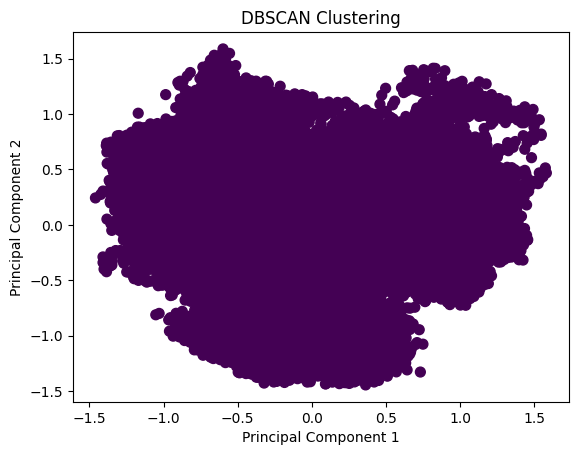

In [ ]:
print("\nDBSCAN Clustering:")
dbscan_clustering()


Gaussian Mixture Clustering:
Time taken for Gaussian Mixture clustering: 223.71 seconds


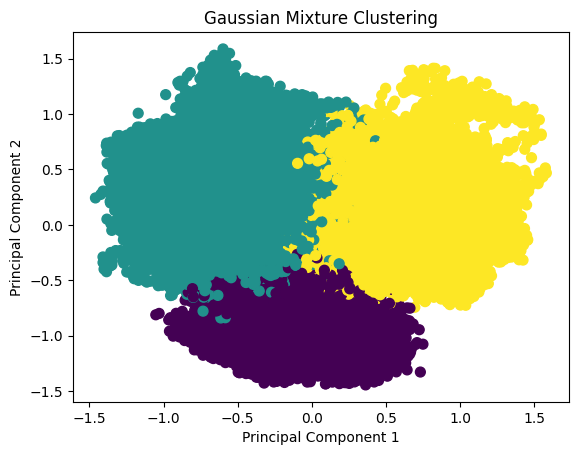

In [ ]:
print("\nGaussian Mixture Clustering:")
gaussian_mixture_clustering()


Mean-Shift Clustering:
Time taken for Mean-Shift clustering: 2902.64 seconds


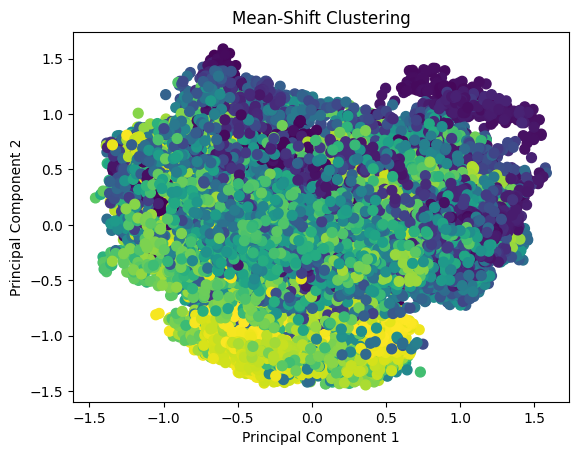

In [ ]:
print("\nMean-Shift Clustering:")
mean_shift_clustering()
